In [ ]:
import json
import os
import pandas as pd
import numpy as np

In [ ]:
projDir = "/content/drive/MyDrive/Comp Med Group Project"
metadataFile = "/content/drive/MyDrive/Comp Med Group Project/metadata.cart.2023-10-19.json"
clinicalFile = "/content/drive/MyDrive/Comp Med Group Project/clinical.cart.2023-10-19.json"

# What's in the metadata file?

In [ ]:
with open(metadataFile,"r") as file:
  metadata = json.load(file)

In [ ]:
type(metadata)

list

In [ ]:
len(metadata),len(metadata[0])

(2698, 14)

In [ ]:
metadata[0]

{'data_format': 'TXT',
 'access': 'open',
 'associated_entities': [{'entity_submitter_id': 'TARGET-20-PANLXK-14A-01D',
   'entity_type': 'aliquot',
   'case_id': 'f19a901f-6260-58a4-bd37-2c4fa2af70d6',
   'entity_id': 'eb17d534-5ecb-4e7e-af30-df039672b5d2'}],
 'file_name': 'c736df8d-904b-490d-9355-00ca4f5b4d56.methylation_array.sesame.level3betas.txt',
 'submitter_id': 'e5cb48d0-b456-4392-ab3b-ba6baa00db86',
 'data_category': 'DNA Methylation',
 'analysis': {'workflow_version': '20230629T1512Z',
  'updated_datetime': '2023-07-20T08:46:24.215286-05:00',
  'workflow_link': 'quay.io/ncigdc',
  'submitter_id': 'c736df8d-904b-490d-9355-00ca4f5b4d56',
  'state': 'released',
  'workflow_type': 'SeSAMe Methylation Beta Estimation',
  'analysis_id': '36345519-fee3-42c3-b1cb-e67edd56976b',
  'created_datetime': '2021-05-10T14:24:21.267155-05:00'},
 'platform': 'Illumina Human Methylation 27',
 'file_size': 772945,
 'md5sum': 'c8e85d78a87672659bf07918d369ddb6',
 'file_id': '0a190633-1676-4c61-9cb

Each position in the metadata list is a dictionary containing the following keys:


*   `'data_format',
*   'access',
*   'associated_entities',
*   'file_name',
*   'submitter_id',
*   'data_category',
*   'analysis',
*   'platform',
*   'file_size',
*   'md5sum',
*   'file_id',
*   'data_type',
*   'state',
*   'experimental_strategy'`

In [ ]:
metadataDf = pd.DataFrame(metadata)
metadataDf

,data_format,access,associated_entities,file_name,submitter_id,data_category,analysis,platform,file_size,md5sum,file_id,data_type,state,experimental_strategy,annotations
0,TXT,open,[{'entity_submitter_id': 'TARGET-20-PANLXK-14A...,c736df8d-904b-490d-9355-00ca4f5b4d56.methylati...,e5cb48d0-b456-4392-ab3b-ba6baa00db86,DNA Methylation,"{'workflow_version': '20230629T1512Z', 'update...",Illumina Human Methylation 27,772945,c8e85d78a87672659bf07918d369ddb6,0a190633-1676-4c61-9cba-a1c7405a2ef3,Methylation Beta Value,released,Methylation Array,NaN
1,TXT,open,[{'entity_submitter_id': 'TARGET-20-PADZCG-04A...,71251baa-7f34-460d-b8e4-6b6cfffaa537.methylati...,ac789bcb-ff75-48e8-bb73-ae6c404bf59b,DNA Methylation,{'workflow_version': 'f8ef9dc6375573fc05fee47b...,Illumina Human Methylation 450,13204832,11b2098d8e7209fe6cdb84813fb5bd42,1ec6b867-7499-4527-ae3d-f4b82321a41a,Methylation Beta Value,released,Methylation Array,NaN
2,TXT,open,[{'entity_submitter_id': 'TARGET-20-PADZCG-09A...,43e05dcf-f69f-4751-a9c1-cf2d1b0c6b74.mirbase21...,mirna_swap_dr11_57_MirnaExpression999ba697-f70...,Transcriptome Profiling,"{'input_files': [{'data_format': 'BAM', 'acces...",NaN,50324,b1699fd449fd78e27f663b26ef81539c,0d6e0673-5441-4a6c-9cf3-5ce659473d7c,miRNA Expression Quantification,released,miRNA-Seq,NaN
3,TXT,open,[{'entity_submitter_id': 'TARGET-20-PAKHBF-09A...,4be83320-8404-4da4-aec1-1e8de614e7fb.mirbase21...,mirna_swap_dr11_178_MirnaExpressione4c35e5b-de...,Transcriptome Profiling,"{'input_files': [{'data_format': 'BAM', 'acces...",NaN,50381,7316836f8622408a2191f5f54b147d93,6466b117-5b29-4abb-bba6-05479860308f,miRNA Expression Quantification,released,miRNA-Seq,NaN
4,TSV,open,[{'entity_submitter_id': 'TARGET-20-PATISD-09A...,094395d1-e6fa-4e69-920a-8929bb8d2455.mirnaseq....,147f0cf8-7572-44b3-88f1-aacc6c61a4c9,Transcriptome Profiling,"{'workflow_version': 'None', 'input_files': [{...",NaN,50313,7e9b470f15c96e32a84909b4a04afca1,add6d3f1-a1fe-456c-b897-eb3c70136ff9,miRNA Expression Quantification,released,miRNA-Seq,"[{'entity_submitter_id': 'TARGET-20-PATISD', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,TXT,open,[{'entity_submitter_id': 'TARGET-20-PARWAS-03A...,8ce52649-91e7-49e6-b27c-4828ce07c6a7.methylati...,8f4e1c33-2974-401d-8f42-7b436860a32f,DNA Methylation,"{'workflow_version': '20230629T1512Z', 'update...",Illumina Human Methylation 27,776686,9c6aff2d69de2ede6c6e74393555aba2,efc1ed80-8208-40c7-81fb-f9dfbf07adff,Methylation Beta Value,released,Methylation Array,NaN
2694,TSV,open,[{'entity_submitter_id': 'TARGET-20-PAVTMY-09A...,aa2bfd64-82be-433b-8b8f-222d49a90843.mirnaseq....,5c981ecd-b703-4d7b-814f-058ba7ed9697,Transcriptome Profiling,"{'workflow_version': 'None', 'input_files': [{...",NaN,50176,15e7dd70bcc071155e18ed241d96ad98,b1652b35-bea5-476b-82f0-61967235343e,miRNA Expression Quantification,released,miRNA-Seq,NaN
2695,TXT,open,[{'entity_submitter_id': 'TARGET-20-PASECW-09A...,abd851df-75bc-4f8a-a846-6a4942faa30c.methylati...,8ffd34ae-ad69-4e4c-88b7-f1c9f48f315d,DNA Methylation,"{'workflow_version': '20230629T1512Z', 'update...",Illumina Human Methylation 27,776567,1c55ff7aa8e71a59b5825088490a35b4,b16dbc8d-9c70-4ca2-9473-8f570439ba3d,Methylation Beta Value,released,Methylation Array,NaN
2696,TXT,open,[{'entity_submitter_id': 'TARGET-20-PASCCS-14A...,ce11611c-c928-4d4f-b1c8-b07d3bd362d8.methylati...,3731dfcb-2dae-4f8d-bafa-39ed6245a129,DNA Methylation,"{'workflow_version': '20230629T1512Z', 'update...",Illumina Human Methylation 27,776898,ee2a6eb368cc759e4a7237aae070e46c,a4f17cae-76bc-4f4f-8cbe-d5648917a851,Methylation Beta Value,released,Methylation Array,NaN


I expanded one of the columns to give easy access to the following columns:



*   `entity_submitter_id`
*   `entity_type`
*   `case_id`
*   `entity_id`



In [ ]:
associated_entities = pd.json_normalize(metadataDf["associated_entities"].apply(lambda x: x[0]))
metadataDf = pd.concat([metadataDf.drop("associated_entities",axis=1), associated_entities], axis=1)
metadataDf.head()

,data_format,access,file_name,submitter_id,data_category,analysis,platform,file_size,md5sum,file_id,data_type,state,experimental_strategy,annotations,entity_submitter_id,entity_type,case_id,entity_id
0,TXT,open,c736df8d-904b-490d-9355-00ca4f5b4d56.methylati...,e5cb48d0-b456-4392-ab3b-ba6baa00db86,DNA Methylation,"{'workflow_version': '20230629T1512Z', 'update...",Illumina Human Methylation 27,772945,c8e85d78a87672659bf07918d369ddb6,0a190633-1676-4c61-9cba-a1c7405a2ef3,Methylation Beta Value,released,Methylation Array,NaN,TARGET-20-PANLXK-14A-01D,aliquot,f19a901f-6260-58a4-bd37-2c4fa2af70d6,eb17d534-5ecb-4e7e-af30-df039672b5d2
1,TXT,open,71251baa-7f34-460d-b8e4-6b6cfffaa537.methylati...,ac789bcb-ff75-48e8-bb73-ae6c404bf59b,DNA Methylation,{'workflow_version': 'f8ef9dc6375573fc05fee47b...,Illumina Human Methylation 450,13204832,11b2098d8e7209fe6cdb84813fb5bd42,1ec6b867-7499-4527-ae3d-f4b82321a41a,Methylation Beta Value,released,Methylation Array,NaN,TARGET-20-PADZCG-04A-02D,aliquot,c3670ebd-1d43-5491-ac10-a158e12c560b,9d3aa98c-84cd-5733-863f-5dd6a62996ad
2,TXT,open,43e05dcf-f69f-4751-a9c1-cf2d1b0c6b74.mirbase21...,mirna_swap_dr11_57_MirnaExpression999ba697-f70...,Transcriptome Profiling,"{'input_files': [{'data_format': 'BAM', 'acces...",NaN,50324,b1699fd449fd78e27f663b26ef81539c,0d6e0673-5441-4a6c-9cf3-5ce659473d7c,miRNA Expression Quantification,released,miRNA-Seq,NaN,TARGET-20-PADZCG-09A-02R,aliquot,c3670ebd-1d43-5491-ac10-a158e12c560b,1507ac24-8ba2-5e57-a05a-86b5157c8377
3,TXT,open,4be83320-8404-4da4-aec1-1e8de614e7fb.mirbase21...,mirna_swap_dr11_178_MirnaExpressione4c35e5b-de...,Transcriptome Profiling,"{'input_files': [{'data_format': 'BAM', 'acces...",NaN,50381,7316836f8622408a2191f5f54b147d93,6466b117-5b29-4abb-bba6-05479860308f,miRNA Expression Quantification,released,miRNA-Seq,NaN,TARGET-20-PAKHBF-09A-01R,aliquot,ef7db4df-3f52-5207-bed2-884bd70b6dc9,f98ee93a-fe7c-5ac5-9bfb-0bb75d32d18c
4,TSV,open,094395d1-e6fa-4e69-920a-8929bb8d2455.mirnaseq....,147f0cf8-7572-44b3-88f1-aacc6c61a4c9,Transcriptome Profiling,"{'workflow_version': 'None', 'input_files': [{...",NaN,50313,7e9b470f15c96e32a84909b4a04afca1,add6d3f1-a1fe-456c-b897-eb3c70136ff9,miRNA Expression Quantification,released,miRNA-Seq,"[{'entity_submitter_id': 'TARGET-20-PATISD', '...",TARGET-20-PATISD-09A-01R,aliquot,efafdf9a-1a9e-5fa9-986b-2f5fbb928c38,261d2857-c563-43e1-9cd0-2dcaa4cfe691


I did the same with the `analysis` column

In [ ]:
analysis = pd.json_normalize(metadataDf["analysis"])
metadataDf = pd.concat([metadataDf.drop(["analysis"],axis=1), analysis], axis=1)
metadataDf.head()

,data_format,access,file_name,submitter_id,data_category,platform,file_size,md5sum,file_id,data_type,...,updated_datetime,workflow_link,submitter_id,state,workflow_type,analysis_id,created_datetime,input_files,workflow_start_datetime,workflow_end_datetime
0,TXT,open,c736df8d-904b-490d-9355-00ca4f5b4d56.methylati...,e5cb48d0-b456-4392-ab3b-ba6baa00db86,DNA Methylation,Illumina Human Methylation 27,772945,c8e85d78a87672659bf07918d369ddb6,0a190633-1676-4c61-9cba-a1c7405a2ef3,Methylation Beta Value,...,2023-07-20T08:46:24.215286-05:00,quay.io/ncigdc,c736df8d-904b-490d-9355-00ca4f5b4d56,released,SeSAMe Methylation Beta Estimation,36345519-fee3-42c3-b1cb-e67edd56976b,2021-05-10T14:24:21.267155-05:00,NaN,NaN,NaN
1,TXT,open,71251baa-7f34-460d-b8e4-6b6cfffaa537.methylati...,ac789bcb-ff75-48e8-bb73-ae6c404bf59b,DNA Methylation,Illumina Human Methylation 450,13204832,11b2098d8e7209fe6cdb84813fb5bd42,1ec6b867-7499-4527-ae3d-f4b82321a41a,Methylation Beta Value,...,2023-07-20T08:50:48.009709-05:00,quay.io/ncigdc,71251baa-7f34-460d-b8e4-6b6cfffaa537,released,SeSAMe Methylation Beta Estimation,bf7c3f8d-3264-475d-9758-70940a509eb1,2021-05-10T14:22:11.112032-05:00,NaN,NaN,NaN
2,TXT,open,43e05dcf-f69f-4751-a9c1-cf2d1b0c6b74.mirbase21...,mirna_swap_dr11_57_MirnaExpression999ba697-f70...,Transcriptome Profiling,NaN,50324,b1699fd449fd78e27f663b26ef81539c,0d6e0673-5441-4a6c-9cf3-5ce659473d7c,miRNA Expression Quantification,...,2018-09-05T17:06:34.909484-05:00,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob...,mirna_swap_dr11_57_MirnaExpressionWorkflow8331...,released,BCGSC miRNA Profiling,3e9e2ac9-7f82-4556-ba1a-a3aed78b0f55,2018-03-20T09:54:55.770353-05:00,"[{'data_format': 'BAM', 'access': 'controlled'...",NaN,NaN
3,TXT,open,4be83320-8404-4da4-aec1-1e8de614e7fb.mirbase21...,mirna_swap_dr11_178_MirnaExpressione4c35e5b-de...,Transcriptome Profiling,NaN,50381,7316836f8622408a2191f5f54b147d93,6466b117-5b29-4abb-bba6-05479860308f,miRNA Expression Quantification,...,2018-09-05T17:06:34.909484-05:00,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob...,mirna_swap_dr11_178_MirnaExpressionWorkflow554...,released,BCGSC miRNA Profiling,e92e5a42-c348-4105-adc2-65c15a8c3359,2018-03-20T09:57:41.077901-05:00,"[{'data_format': 'BAM', 'access': 'controlled'...",NaN,NaN
4,TSV,open,094395d1-e6fa-4e69-920a-8929bb8d2455.mirnaseq....,147f0cf8-7572-44b3-88f1-aacc6c61a4c9,Transcriptome Profiling,NaN,50313,7e9b470f15c96e32a84909b4a04afca1,add6d3f1-a1fe-456c-b897-eb3c70136ff9,miRNA Expression Quantification,...,2019-09-03T08:03:02.964547-05:00,https://github.com/NCI-GDC/gdc-mirnaseq-cwl/bl...,094395d1-e6fa-4e69-920a-8929bb8d2455_mirna_exp...,released,BCGSC miRNA Profiling,bf29836a-5705-470f-a39a-d24a507c774f,2019-08-27T11:55:31.513229-05:00,[{'proportion_reads_mapped': 0.958717473551840...,NaN,NaN


In [ ]:
metadataDf["input_files"].apply(lambda x: x[0] if type(x)==list else None)

0                                                    None
1                                                    None
2       {'data_format': 'BAM', 'access': 'controlled',...
3       {'data_format': 'BAM', 'access': 'controlled',...
4       {'proportion_reads_mapped': 0.9587174735518406...
                              ...                        
2693                                                 None
2694    {'proportion_reads_mapped': 0.9476705678346702...
2695                                                 None
2696                                                 None
2697                                                 None
Name: input_files, Length: 2698, dtype: object

In [ ]:
# inputFiles = pd.json_normalize(metadataDf["input_files"].apply(lambda x: x[0] if type(x)==list else None))
# metadataDf = pd.concat([metadataDf.drop(["input_files"],axis=1), inputFiles], axis=1)
# metadataDf.head()

Here is a final list of columns in the metadata files

In [ ]:
metadataDf.columns

Index(['data_format', 'access', 'file_name', 'submitter_id', 'data_category',
       'platform', 'file_size', 'md5sum', 'file_id', 'data_type', 'state',
       'experimental_strategy', 'annotations', 'entity_submitter_id',
       'entity_type', 'case_id', 'entity_id', 'workflow_version',
       'updated_datetime', 'workflow_link', 'submitter_id', 'state',
       'workflow_type', 'analysis_id', 'created_datetime', 'input_files',
       'workflow_start_datetime', 'workflow_end_datetime'],
      dtype='object')

# What's in the Clinical file?

In [ ]:
with open(clinicalFile,"r") as file:
  clinical = json.load(file)

In [ ]:
type(clinical)

list

In [ ]:
len(clinical),len(clinical[0])

(1893, 3)

In [ ]:
clinical[0]

{'case_id': '29312892-078e-4a35-809c-729f55370967',
 'diagnoses': [{'irs_stage': None,
   'iss_stage': None,
   'ajcc_pathologic_stage': None,
   'ann_arbor_clinical_stage': None,
   'created_datetime': '2019-08-02T16:02:18.931765-05:00',
   'enneking_msts_stage': None,
   'inrg_stage': None,
   'enneking_msts_metastasis': None,
   'tissue_or_organ_of_origin': 'Bone marrow',
   'age_at_diagnosis': 3505,
   'esophageal_columnar_dysplasia_degree': None,
   'cog_liver_stage': None,
   'child_pugh_classification': None,
   'metastasis_at_diagnosis_site': None,
   'state': 'released',
   'prior_treatment': None,
   'cog_rhabdomyosarcoma_risk_group': None,
   'days_to_last_known_disease_status': None,
   'primary_gleason_grade': None,
   'inpc_grade': None,
   'ajcc_pathologic_t': None,
   'morphology': '9861/3',
   'ajcc_pathologic_n': None,
   'ajcc_pathologic_m': None,
   'irs_group': None,
   'medulloblastoma_molecular_classification': None,
   'wilms_tumor_histologic_subtype': None,
   

The Clinical data contains rows of the following keys:



*   `case_id`
*   `Diagnoses`
*   `Demographic`

each key has multiple keys each (see above)

In [ ]:
clinicalDf = pd.DataFrame(clinical)
clinicalDf.head()

,case_id,diagnoses,demographic
0,29312892-078e-4a35-809c-729f55370967,"[{'irs_stage': None, 'iss_stage': None, 'ajcc_...","{'cause_of_death': None, 'race': 'black or afr..."
1,cecefca5-6308-49f6-b9c2-226235d60613,"[{'irs_stage': None, 'iss_stage': None, 'ajcc_...","{'cause_of_death': None, 'race': 'white', 'gen..."
2,56404ff6-a971-4d84-9891-0053b1075ee3,"[{'irs_stage': None, 'iss_stage': None, 'ajcc_...","{'cause_of_death': None, 'race': 'white', 'gen..."
3,792187f7-d5c3-497d-9573-f7411f027aa3,"[{'irs_stage': None, 'iss_stage': None, 'ajcc_...","{'cause_of_death': None, 'race': 'white', 'gen..."
4,564a13c1-9271-43a4-988a-01ffc316aa9f,"[{'irs_stage': None, 'iss_stage': None, 'ajcc_...","{'cause_of_death': None, 'race': 'white', 'gen..."


In [ ]:
diagnoses=clinicalDf["diagnoses"].apply(pd.Series)
diagnoses.head()

,0
0,"{'irs_stage': None, 'iss_stage': None, 'ajcc_p..."
1,"{'irs_stage': None, 'iss_stage': None, 'ajcc_p..."
2,"{'irs_stage': None, 'iss_stage': None, 'ajcc_p..."
3,"{'irs_stage': None, 'iss_stage': None, 'ajcc_p..."
4,"{'irs_stage': None, 'iss_stage': None, 'ajcc_p..."


In [ ]:
diagnoses[0].dropna(inplace=True)

I merged all the diagnosis and demographic columns. To retrieve each individually, we can use `diagnoses` and `demographic` variables.

In [ ]:
diagnoses = pd.json_normalize(diagnoses[0])
demographic = pd.json_normalize(clinicalDf["demographic"])
clinicalDf = pd.concat([clinicalDf.drop(["diagnoses","demographic"],axis=1), diagnoses, demographic], axis=1)
clinicalDf.head()

,case_id,irs_stage,iss_stage,ajcc_pathologic_stage,ann_arbor_clinical_stage,created_datetime,enneking_msts_stage,inrg_stage,enneking_msts_metastasis,tissue_or_organ_of_origin,...,created_datetime,year_of_birth,premature_at_birth,weeks_gestation_at_birth,demographic_id,updated_datetime,age_is_obfuscated,days_to_death,state,year_of_death
0,29312892-078e-4a35-809c-729f55370967,NaN,NaN,NaN,NaN,2019-08-02T16:02:18.931765-05:00,NaN,NaN,NaN,Bone marrow,...,2019-08-02T15:23:07.679693-05:00,NaN,NaN,NaN,4c2a2dce-e42e-48db-b834-8e9707d51d18,2023-07-20T22:49:08.094900-05:00,False,191.0,released,NaN
1,cecefca5-6308-49f6-b9c2-226235d60613,NaN,NaN,NaN,NaN,2019-08-02T16:02:18.931765-05:00,NaN,NaN,NaN,Bone marrow,...,2019-08-02T15:23:07.679693-05:00,NaN,NaN,NaN,dc705b73-b52a-4cbb-b046-d9610f589931,2023-07-21T03:22:27.511522-05:00,False,NaN,released,NaN
2,56404ff6-a971-4d84-9891-0053b1075ee3,NaN,NaN,NaN,NaN,2019-08-02T16:02:18.931765-05:00,NaN,NaN,NaN,Bone marrow,...,2019-08-02T15:23:07.679693-05:00,NaN,NaN,NaN,47915797-56b4-4319-b970-27a8773a9e73,2023-07-21T02:20:17.988378-05:00,False,117.0,released,NaN
3,792187f7-d5c3-497d-9573-f7411f027aa3,NaN,NaN,NaN,NaN,2019-08-02T16:02:18.931765-05:00,NaN,NaN,NaN,Bone marrow,...,2019-08-02T15:23:07.679693-05:00,NaN,NaN,NaN,8933e4e3-d031-4eea-a42e-5013500f0863,2023-07-21T04:40:43.193670-05:00,False,NaN,released,NaN
4,564a13c1-9271-43a4-988a-01ffc316aa9f,NaN,NaN,NaN,NaN,2019-08-02T16:02:18.931765-05:00,NaN,NaN,NaN,Bone marrow,...,2019-08-02T15:23:07.679693-05:00,NaN,NaN,NaN,468bed1e-55ba-4173-b5c0-a62307971a77,2023-07-21T02:36:46.703728-05:00,False,712.0,released,NaN


In [ ]:
diagnoses.columns

Index(['irs_stage', 'iss_stage', 'ajcc_pathologic_stage',
       'ann_arbor_clinical_stage', 'created_datetime', 'enneking_msts_stage',
       'inrg_stage', 'enneking_msts_metastasis', 'tissue_or_organ_of_origin',
       'age_at_diagnosis', 'esophageal_columnar_dysplasia_degree',
       'cog_liver_stage', 'child_pugh_classification',
       'metastasis_at_diagnosis_site', 'state', 'prior_treatment',
       'cog_rhabdomyosarcoma_risk_group', 'days_to_last_known_disease_status',
       'primary_gleason_grade', 'inpc_grade', 'ajcc_pathologic_t',
       'morphology', 'ajcc_pathologic_n', 'ajcc_pathologic_m', 'irs_group',
       'medulloblastoma_molecular_classification',
       'wilms_tumor_histologic_subtype', 'residual_disease',
       'weiss_assessment_score', 'classification_of_tumor', 'tumor_focality',
       'ann_arbor_b_symptoms', 'icd_10_code', 'cog_renal_stage', 'figo_stage',
       'synchronous_malignancy', 'burkitt_lymphoma_clinical_variant',
       'days_to_best_overall_respons

In [ ]:
demographic.columns

Index(['cause_of_death', 'race', 'gender', 'ethnicity', 'vital_status',
       'age_at_index', 'submitter_id', 'days_to_birth', 'created_datetime',
       'year_of_birth', 'premature_at_birth', 'weeks_gestation_at_birth',
       'demographic_id', 'updated_datetime', 'age_is_obfuscated',
       'days_to_death', 'state', 'year_of_death'],
      dtype='object')

# Using clinical and metadata to access data files

We know that clinical has `case_id` as a column, which is a patient identifier. Metadata also has `case_id` as a column which tells us which arrays and datafiles are associated with this patient. Let's see what data one patient has.

In [ ]:
examplePatient = "29312892-078e-4a35-809c-729f55370967"

# Retrieve clinical and demographic variables of this patient
clinicalDf[clinicalDf["case_id"] == examplePatient]

,case_id,irs_stage,iss_stage,ajcc_pathologic_stage,ann_arbor_clinical_stage,created_datetime,enneking_msts_stage,inrg_stage,enneking_msts_metastasis,tissue_or_organ_of_origin,...,created_datetime,year_of_birth,premature_at_birth,weeks_gestation_at_birth,demographic_id,updated_datetime,age_is_obfuscated,days_to_death,state,year_of_death
0,29312892-078e-4a35-809c-729f55370967,NaN,NaN,NaN,NaN,2019-08-02T16:02:18.931765-05:00,NaN,NaN,NaN,Bone marrow,...,2019-08-02T15:23:07.679693-05:00,NaN,NaN,NaN,4c2a2dce-e42e-48db-b834-8e9707d51d18,2023-07-20T22:49:08.094900-05:00,False,191.0,released,NaN


In [ ]:
# Retrieve assay data of this patient
metadataDf[metadataDf["case_id"] == examplePatient]

,data_format,access,file_name,submitter_id,data_category,platform,file_size,md5sum,file_id,data_type,...,updated_datetime,workflow_link,submitter_id,state,workflow_type,analysis_id,created_datetime,input_files,workflow_start_datetime,workflow_end_datetime
1636,TSV,open,6c388b0c-a886-416f-bc41-d6520810d87a.mirnaseq....,93e6fb1c-9d81-4358-bf2c-5612a05a7b38,Transcriptome Profiling,NaN,50034,d191e85786b63d575e1b3a36a22ec60e,24ec33c9-a140-4da4-ac96-784401108279,miRNA Expression Quantification,...,2019-09-19T09:10:55.482999-05:00,https://github.com/NCI-GDC/gdc-mirnaseq-cwl/bl...,6c388b0c-a886-416f-bc41-d6520810d87a_mirna_exp...,released,BCGSC miRNA Profiling,749a8de6-771a-4471-a9cd-40262a1271f8,2019-08-27T12:05:13.167145-05:00,[{'proportion_reads_mapped': 0.970075828808344...,NaN,NaN


In [ ]:
clinicalDf[clinicalDf["case_id"] == examplePatient]["progression_or_recurrence"]

0   NaN
Name: progression_or_recurrence, dtype: float64

In [ ]:
# Retrieve the raw data

# Specify data directory
dataDir="/content/drive/MyDrive/Comp Med Group Project/data"

# Specify file name
fileName=metadataDf[metadataDf["case_id"] == examplePatient]["file_name"].unique()[0]

# Specify folder name
folderName=metadataDf[metadataDf["case_id"] == examplePatient]["file_id"].unique()[0]

# We use the file identifier to take the file, since the file name in the data folder is cut off compared to what is in the table

folderDir=os.path.join(dataDir,folderName)
fileList=os.listdir(folderDir)

assert fileList[0].split(".")[0] == fileName.split(".")[0]

In [ ]:
fileDir = os.path.join(folderDir, fileList[0])

readFile = pd.read_csv(fileDir,sep="\t")

In [ ]:
readFile.head()

,miRNA_ID,read_count,reads_per_million_miRNA_mapped,cross-mapped
0,hsa-let-7a-1,37912,26325.364619,N
1,hsa-let-7a-2,37550,26073.998772,N
2,hsa-let-7a-3,37877,26301.061292,N
3,hsa-let-7b,38536,26758.658234,N
4,hsa-let-7c,184,127.766066,N


# Are there data folders with more than one file?

In [ ]:
for folder in os.listdir(dataDir):
  if not "txt" in folder:
    files = os.listdir(os.path.join(dataDir,folder))
    length = len(files)
    if length > 1:
      print(f"More than one data file found in folder {folder}")

More than one data file found in folder 8e84b29f-8aa2-4ad1-a539-8ef1c4592a9f
More than one data file found in folder b23989cb-81c5-4b19-acf9-fa06c84472e4
More than one data file found in folder 0017b0af-d83e-4047-823b-c057afdef3f5
More than one data file found in folder a7232281-73c1-4057-aa01-f1494147754d
More than one data file found in folder add6d3f1-a1fe-456c-b897-eb3c70136ff9


In [ ]:
# Let's look at what's inside the folders

files = os.listdir(os.path.join(dataDir,"add6d3f1-a1fe-456c-b897-eb3c70136ff9"))

print(files)

# We can see that there can be a "annotations.txt" file present

['094395d1-e6fa-4e69-920a-8929bb8d2455.mirnaseq.mirnas.quantifica', 'annotations.txt']


# How many patients have more than one assay type present?

Conclusion: There are 1025 cases with more than 1 assay type present. There are 706 methylation data and 319 miRNA data.

If we look at all patients regardless, there are 1898 methylation data and 800 miRNA data.

In [ ]:
v = metadataDf["case_id"].value_counts()
v

d3e45fd3-fc4e-59ec-8f32-b80665f21845    8
53e602f5-16ea-5971-805d-229fd5b4299b    8
280a58bc-0f3e-54db-94a5-0263b77d4263    7
62283df5-77d9-5460-a1e3-79c3904c1b1e    6
231fd5a0-64d9-57b3-a713-03633fadce43    6
                                       ..
1ad4ee57-9e18-4512-a47b-3fa0f51082f2    1
173e9ebe-4003-4fd1-9d05-3d27e3ddc60c    1
1a9ff5ce-12f2-4a4f-9a31-8307cf751d54    1
17268cdf-d812-57b2-bbcc-a23da0f1ee57    1
c2abf01a-36eb-4066-ae9d-fe2854f8253b    1
Name: case_id, Length: 1893, dtype: int64

In [ ]:
metadataDf["data_category"].unique()

array(['DNA Methylation', 'Transcriptome Profiling'], dtype=object)

In [ ]:
mcase = metadataDf[metadataDf["case_id"].isin(v.index[v.gt(2)])]
mcase

,data_format,access,file_name,submitter_id,data_category,platform,file_size,md5sum,file_id,data_type,...,updated_datetime,workflow_link,submitter_id,state,workflow_type,analysis_id,created_datetime,input_files,workflow_start_datetime,workflow_end_datetime
0,TXT,open,c736df8d-904b-490d-9355-00ca4f5b4d56.methylati...,e5cb48d0-b456-4392-ab3b-ba6baa00db86,DNA Methylation,Illumina Human Methylation 27,772945,c8e85d78a87672659bf07918d369ddb6,0a190633-1676-4c61-9cba-a1c7405a2ef3,Methylation Beta Value,...,2023-07-20T08:46:24.215286-05:00,quay.io/ncigdc,c736df8d-904b-490d-9355-00ca4f5b4d56,released,SeSAMe Methylation Beta Estimation,36345519-fee3-42c3-b1cb-e67edd56976b,2021-05-10T14:24:21.267155-05:00,NaN,NaN,NaN
1,TXT,open,71251baa-7f34-460d-b8e4-6b6cfffaa537.methylati...,ac789bcb-ff75-48e8-bb73-ae6c404bf59b,DNA Methylation,Illumina Human Methylation 450,13204832,11b2098d8e7209fe6cdb84813fb5bd42,1ec6b867-7499-4527-ae3d-f4b82321a41a,Methylation Beta Value,...,2023-07-20T08:50:48.009709-05:00,quay.io/ncigdc,71251baa-7f34-460d-b8e4-6b6cfffaa537,released,SeSAMe Methylation Beta Estimation,bf7c3f8d-3264-475d-9758-70940a509eb1,2021-05-10T14:22:11.112032-05:00,NaN,NaN,NaN
2,TXT,open,43e05dcf-f69f-4751-a9c1-cf2d1b0c6b74.mirbase21...,mirna_swap_dr11_57_MirnaExpression999ba697-f70...,Transcriptome Profiling,NaN,50324,b1699fd449fd78e27f663b26ef81539c,0d6e0673-5441-4a6c-9cf3-5ce659473d7c,miRNA Expression Quantification,...,2018-09-05T17:06:34.909484-05:00,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob...,mirna_swap_dr11_57_MirnaExpressionWorkflow8331...,released,BCGSC miRNA Profiling,3e9e2ac9-7f82-4556-ba1a-a3aed78b0f55,2018-03-20T09:54:55.770353-05:00,"[{'data_format': 'BAM', 'access': 'controlled'...",NaN,NaN
5,TXT,open,a1e335ef-7f45-4be5-a55b-28ec933c6998.methylati...,fdcdd908-c8c3-458a-b06e-e62de6954326,DNA Methylation,Illumina Human Methylation 450,13217722,3018202cfad6c1eb2fa6b57aacfdbc21,eb1e18dd-b453-406e-8745-0799252f2894,Methylation Beta Value,...,2023-07-20T08:33:27.769570-05:00,quay.io/ncigdc,a1e335ef-7f45-4be5-a55b-28ec933c6998,released,SeSAMe Methylation Beta Estimation,09f8857f-87ae-4cbd-8198-3d5653e21c54,2021-05-10T14:19:02.789445-05:00,NaN,NaN,NaN
6,TXT,open,55679c78-949c-4d10-97c2-90ed7532120a.mirbase21...,mirna_swap_dr11_220_MirnaExpressionbbc58694-a8...,Transcriptome Profiling,NaN,50270,b24ff45b4bc1a4f50108a9bbe5c49aa8,3faa618f-011e-4558-b635-df6a7ecf72c5,miRNA Expression Quantification,...,2018-09-05T17:06:34.909484-05:00,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob...,mirna_swap_dr11_220_MirnaExpressionWorkflowf08...,released,BCGSC miRNA Profiling,54a2ddfb-8efd-4b3a-9021-8c1c8f2851ae,2018-03-20T09:59:50.464865-05:00,"[{'data_format': 'BAM', 'access': 'controlled'...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,TXT,open,f9b169bf-f390-47c6-a7e7-5db7745ddf46.mirbase21...,mirna_swap_dr11_231_MirnaExpression317bb9fd-6f...,Transcriptome Profiling,NaN,50420,f355a8784c6169b5175e99728e101f24,604abbb3-76f3-491e-a2cf-23f4da724ce3,miRNA Expression Quantification,...,2018-09-05T17:06:34.909484-05:00,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob...,mirna_swap_dr11_231_MirnaExpressionWorkflow4dd...,released,BCGSC miRNA Profiling,2da70736-ce37-42f1-866c-9154a57e672a,2018-03-20T09:59:50.464865-05:00,"[{'data_format': 'BAM', 'access': 'controlled'...",NaN,NaN
2690,TXT,open,6e97c385-17e3-4a29-866f-bbb263f24775.mirbase21...,mirna_swap_dr11_149_MirnaExpression12b9fc19-26...,Transcriptome Profiling,NaN,50464,7eb70f3304aa7e8db77681befb26f081,e95446c3-e3e6-4f53-9d73-c3b121a6f5de,miRNA Expression Quantification,...,2018-09-05T17:06:34.909484-05:00,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob...,mirna_swap_dr11_149_MirnaExpressionWorkflow992...,released,BCGSC miRNA Profiling,97dd2978-f800-472b-8ccf-e81d346bfe68,2018-03-20T09:57:41.077901-05:00,"[{'data_format': 'BAM', 'access': 'controlled'...",NaN,NaN
2695,TXT,open,abd851df-75bc-4f8a-a846-6a4942faa30c.methylati...,8ffd34ae-ad69-4e4c-88b7

In [ ]:
w = metadataDf["data_type"].value_counts()
w

miRNA Expression Quantification    1898
Methylation Beta Value              800
Name: data_type, dtype: int64

In [ ]:
mcase["data_category"].unique()

array(['DNA Methylation', 'Transcriptome Profiling'], dtype=object)

In [ ]:
mcase.iloc[1]

data_format                                                              TXT
access                                                                  open
file_name                  71251baa-7f34-460d-b8e4-6b6cfffaa537.methylati...
submitter_id                            ac789bcb-ff75-48e8-bb73-ae6c404bf59b
data_category                                                DNA Methylation
platform                                      Illumina Human Methylation 450
file_size                                                           13204832
md5sum                                      11b2098d8e7209fe6cdb84813fb5bd42
file_id                                 1ec6b867-7499-4527-ae3d-f4b82321a41a
data_type                                             Methylation Beta Value
state                                                               released
experimental_strategy                                      Methylation Array
annotations                                                              NaN

In [ ]:
# let's use an example of a patient with more than one assay data available

examplePatient1 = "f19a901f-6260-58a4-bd37-2c4fa2af70d6"

case1 = mcase[mcase["case_id"] == examplePatient1]

case1

# This patient has 2 methylation assays and 1 miRNA profiling assay

,data_format,access,file_name,submitter_id,data_category,platform,file_size,md5sum,file_id,data_type,...,updated_datetime,workflow_link,submitter_id,state,workflow_type,analysis_id,created_datetime,input_files,workflow_start_datetime,workflow_end_datetime
0,TXT,open,c736df8d-904b-490d-9355-00ca4f5b4d56.methylati...,e5cb48d0-b456-4392-ab3b-ba6baa00db86,DNA Methylation,Illumina Human Methylation 27,772945,c8e85d78a87672659bf07918d369ddb6,0a190633-1676-4c61-9cba-a1c7405a2ef3,Methylation Beta Value,...,2023-07-20T08:46:24.215286-05:00,quay.io/ncigdc,c736df8d-904b-490d-9355-00ca4f5b4d56,released,SeSAMe Methylation Beta Estimation,36345519-fee3-42c3-b1cb-e67edd56976b,2021-05-10T14:24:21.267155-05:00,NaN,NaN,NaN
57,TXT,open,43618429-4d1b-4745-87ef-13fad39c1f66.mirbase21...,mirna_swap_dr11_185_MirnaExpression443e798a-ab...,Transcriptome Profiling,NaN,50373,3244d17e035ee8a90e213f017744e091,f22d9dc8-ed7a-4b05-8e3f-a20c0ca85af1,miRNA Expression Quantification,...,2018-09-05T17:06:34.909484-05:00,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob...,mirna_swap_dr11_185_MirnaExpressionWorkflow147...,released,BCGSC miRNA Profiling,dbbfd8f5-5270-48fe-ab8f-5bcb0c2e1868,2018-03-20T09:57:41.077901-05:00,"[{'data_format': 'BAM', 'access': 'controlled'...",NaN,NaN
263,TXT,open,c18d3bbf-7bf9-4dc2-b726-83e09f0f575e.methylati...,619bc217-509e-4643-ad24-f18b67d3388c,DNA Methylation,Illumina Human Methylation 27,772978,d24e550f6729ff7162af6035cc8c8fb9,dc2522e8-8d59-4709-90b1-29d7511d606e,Methylation Beta Value,...,2023-07-20T08:38:27.104321-05:00,quay.io/ncigdc,c18d3bbf-7bf9-4dc2-b726-83e09f0f575e,released,SeSAMe Methylation Beta Estimation,e645f5e4-0db0-4fe6-a3e8-2ff56668d776,2021-05-10T14:11:06.778568-05:00,NaN,NaN,NaN


In [ ]:
# How many patients have both methylation and transcriptomic profiling?

def check_assay(df):
  caseIDs = df['case_id'].tolist()
  count = 0
  listratio = []
  DMonly = 0
  TPonly = 0
  chosenPatients = []
  for patient in caseIDs:
    dfSubset = df[df["case_id"] == patient]
    assays = dfSubset['data_category'].tolist()
    if ("DNA Methylation" in assays) and ("Transcriptome Profiling" in assays):
      count += 1
      countDM = assays.count("DNA Methylation")
      countTP = assays.count("Transcriptome Profiling")
      ratio = countDM / countTP
      listratio.append(ratio)
      chosenPatients.append(patient)
    else:
      if assays[0] == "DNA Methylation":
        DMonly += 1
      else:
        TPonly += 1
  return count, listratio, DMonly, TPonly, chosenPatients

numPatients, DM_TP_ratio, DMonly, TPonly, casesList = check_assay(metadataDf)

numPatients, DMonly, TPonly

(988, 133, 1577)

988 patients have both methylation and transcriptomic data. Of the remaining, 133 patients only have methylation data while 1577 only have transcriptomic data (above).

Patients who have both methylation and transcriptomic data have 1 to 6 times as many methylation data as transscriptomic data, but mostly twice as many (below).

(array([ 12., 275., 411.,   0., 236.,   0.,   5.,   0.,  42.,   7.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

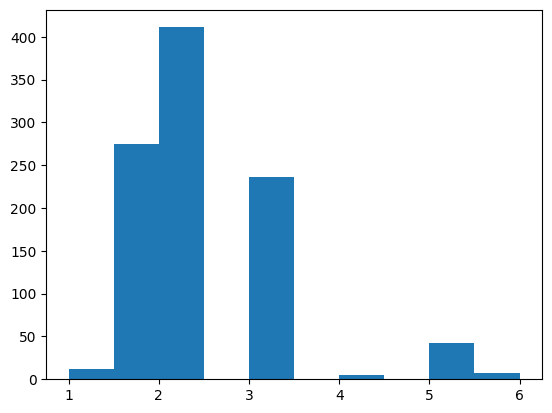

In [ ]:
import matplotlib.pyplot as plt

plt.hist(x=DM_TP_ratio)

In [ ]:
casesList

['f19a901f-6260-58a4-bd37-2c4fa2af70d6',
 'c3670ebd-1d43-5491-ac10-a158e12c560b',
 'c3670ebd-1d43-5491-ac10-a158e12c560b',
 'f523f8ab-3985-520b-8ea6-89fd016da615',
 'f269cedb-e429-5e41-af1b-f532b15c73ad',
 'd001840d-8950-5ce1-a29b-fcdd5154db64',
 'f79cfed6-ee99-59b2-a7e6-27e2a5c98a1e',
 'fb2b2fd7-f8a0-575d-8f41-7609a9b2467f',
 'fd97e840-a0d4-574b-be8d-c7cc9fb37bb9',
 'fc171729-17c1-5857-adeb-4b3af1eb1bce',
 'fc171729-17c1-5857-adeb-4b3af1eb1bce',
 'fc171729-17c1-5857-adeb-4b3af1eb1bce',
 'fe0fa666-d6eb-5188-b539-cd0f0f3df39c',
 'fe0fa666-d6eb-5188-b539-cd0f0f3df39c',
 'fe0fa666-d6eb-5188-b539-cd0f0f3df39c',
 'c64422e9-7b9b-5c33-8f2a-457a9457b9f3',
 'f1116404-e796-5d7a-8ede-cb7cb990384b',
 'c3670ebd-1d43-5491-ac10-a158e12c560b',
 'f19a901f-6260-58a4-bd37-2c4fa2af70d6',
 'd0017b1d-2364-5eea-8ff2-107c0e300ea5',
 'f269cedb-e429-5e41-af1b-f532b15c73ad',
 'd001840d-8950-5ce1-a29b-fcdd5154db64',
 'f523f8ab-3985-520b-8ea6-89fd016da615',
 'fa3966de-9ba8-5ae2-9953-7b15d97c6e2f',
 '082f81eb-f43e-

# Let's subset metadata and clinical using these cases.

In [ ]:
metadataSubset = metadataDf[metadataDf["case_id"].isin(casesList)]
clinicalSubset = clinicalDf[clinicalDf["case_id"].isin(casesList)]

In [ ]:
metadataSubset.head()

,data_format,access,file_name,submitter_id,data_category,platform,file_size,md5sum,file_id,data_type,...,updated_datetime,workflow_link,submitter_id,state,workflow_type,analysis_id,created_datetime,input_files,workflow_start_datetime,workflow_end_datetime
0,TXT,open,c736df8d-904b-490d-9355-00ca4f5b4d56.methylati...,e5cb48d0-b456-4392-ab3b-ba6baa00db86,DNA Methylation,Illumina Human Methylation 27,772945,c8e85d78a87672659bf07918d369ddb6,0a190633-1676-4c61-9cba-a1c7405a2ef3,Methylation Beta Value,...,2023-07-20T08:46:24.215286-05:00,quay.io/ncigdc,c736df8d-904b-490d-9355-00ca4f5b4d56,released,SeSAMe Methylation Beta Estimation,36345519-fee3-42c3-b1cb-e67edd56976b,2021-05-10T14:24:21.267155-05:00,NaN,NaN,NaN
1,TXT,open,71251baa-7f34-460d-b8e4-6b6cfffaa537.methylati...,ac789bcb-ff75-48e8-bb73-ae6c404bf59b,DNA Methylation,Illumina Human Methylation 450,13204832,11b2098d8e7209fe6cdb84813fb5bd42,1ec6b867-7499-4527-ae3d-f4b82321a41a,Methylation Beta Value,...,2023-07-20T08:50:48.009709-05:00,quay.io/ncigdc,71251baa-7f34-460d-b8e4-6b6cfffaa537,released,SeSAMe Methylation Beta Estimation,bf7c3f8d-3264-475d-9758-70940a509eb1,2021-05-10T14:22:11.112032-05:00,NaN,NaN,NaN
2,TXT,open,43e05dcf-f69f-4751-a9c1-cf2d1b0c6b74.mirbase21...,mirna_swap_dr11_57_MirnaExpression999ba697-f70...,Transcriptome Profiling,NaN,50324,b1699fd449fd78e27f663b26ef81539c,0d6e0673-5441-4a6c-9cf3-5ce659473d7c,miRNA Expression Quantification,...,2018-09-05T17:06:34.909484-05:00,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob...,mirna_swap_dr11_57_MirnaExpressionWorkflow8331...,released,BCGSC miRNA Profiling,3e9e2ac9-7f82-4556-ba1a-a3aed78b0f55,2018-03-20T09:54:55.770353-05:00,"[{'data_format': 'BAM', 'access': 'controlled'...",NaN,NaN
5,TXT,open,a1e335ef-7f45-4be5-a55b-28ec933c6998.methylati...,fdcdd908-c8c3-458a-b06e-e62de6954326,DNA Methylation,Illumina Human Methylation 450,13217722,3018202cfad6c1eb2fa6b57aacfdbc21,eb1e18dd-b453-406e-8745-0799252f2894,Methylation Beta Value,...,2023-07-20T08:33:27.769570-05:00,quay.io/ncigdc,a1e335ef-7f45-4be5-a55b-28ec933c6998,released,SeSAMe Methylation Beta Estimation,09f8857f-87ae-4cbd-8198-3d5653e21c54,2021-05-10T14:19:02.789445-05:00,NaN,NaN,NaN
6,TXT,open,55679c78-949c-4d10-97c2-90ed7532120a.mirbase21...,mirna_swap_dr11_220_MirnaExpressionbbc58694-a8...,Transcriptome Profiling,NaN,50270,b24ff45b4bc1a4f50108a9bbe5c49aa8,3faa618f-011e-4558-b635-df6a7ecf72c5,miRNA Expression Quantification,...,2018-09-05T17:06:34.909484-05:00,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob...,mirna_swap_dr11_220_MirnaExpressionWorkflowf08...,released,BCGSC miRNA Profiling,54a2ddfb-8efd-4b3a-9021-8c1c8f2851ae,2018-03-20T09:59:50.464865-05:00,"[{'data_format': 'BAM', 'access': 'controlled'...",NaN,NaN


In [ ]:
clinicalSubset.head()

,case_id,irs_stage,iss_stage,ajcc_pathologic_stage,ann_arbor_clinical_stage,created_datetime,enneking_msts_stage,inrg_stage,enneking_msts_metastasis,tissue_or_organ_of_origin,...,created_datetime,year_of_birth,premature_at_birth,weeks_gestation_at_birth,demographic_id,updated_datetime,age_is_obfuscated,days_to_death,state,year_of_death
10,798f95cc-ae1e-5307-a776-9e562c3a7bd2,NaN,NaN,NaN,NaN,2016-04-25T16:25:09.923381-05:00,NaN,NaN,NaN,Bone marrow,...,2017-02-24T21:09:52.179428-06:00,NaN,NaN,NaN,64d2be52-a4a6-5756-89f5-855e12befa20,2023-07-20T19:04:14.771876-05:00,False,531.0,released,NaN
14,d001840d-8950-5ce1-a29b-fcdd5154db64,NaN,NaN,NaN,NaN,2016-04-25T16:26:31.642772-05:00,NaN,NaN,NaN,Bone marrow,...,2017-02-24T21:13:10.738286-06:00,NaN,NaN,NaN,d41a856b-536b-5ba8-b09c-53779737eee5,2023-07-20T19:43:16.567474-05:00,False,702.0,released,NaN
23,d088a72c-7594-5ed0-b4bd-fd4914633270,NaN,NaN,NaN,NaN,2016-04-25T16:25:43.545447-05:00,NaN,NaN,NaN,Bone marrow,...,2017-02-24T21:11:13.552206-06:00,NaN,NaN,NaN,19ea6160-c200-5e2b-b444-0986c1dd7ce8,2023-07-20T19:20:44.340766-05:00,False,NaN,released,NaN
31,a6710fcc-984c-5c7a-b0b2-1786822e0c0f,NaN,NaN,NaN,NaN,2016-04-25T16:29:04.446887-05:00,NaN,NaN,NaN,Bone marrow,...,2017-02-24T21:18:18.406829-06:00,NaN,NaN,NaN,3f10c4f5-58ed-56f5-887d-403b579dbb2a,2023-07-20T20:34:45.496816-05:00,False,NaN,released,NaN
32,d1b986d2-1317-5ee7-ab78-441ea68500f0,NaN,NaN,NaN,NaN,2016-04-25T16:22:30.729569-05:00,NaN,NaN,NaN,Bone marrow,...,2017-02-24T21:04:40.290774-06:00,NaN,NaN,NaN,9c9823e1-9c45-5992-af85-4b71a6138889,2023-07-20T16:59:57.169403-05:00,False,398.0,released,NaN


# Let's find informative variables in the clinical variables.

From the plot below, we can see a lot variables have all NaNs, and some have 0 NaNs. `days_to_death` is NaNs for some, and non-NaN for some.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96],
 [Text(0, 0, 'case_id'),
  Text(1, 0, 'irs_stage'),
  Text(2, 0, 'iss_stage'),
  Text(3, 0, 'ajcc_pathologic_stage'),
  Text(4, 0, 'ann_arbor_clinical_stage'),
  Text(5, 0, 'created_datetime'),
  Text(6, 0, 'enneking_msts_stage'),
  Text(7, 0, 'inrg_stage'),
  Text(8, 0, 'enneking_msts_metastasis'),
  Text(9, 0, 'tissue_or_organ_of_origin'),
  Text(10, 0, 'age_at_diagnosis'),
  Text(11, 0, 'esophageal_columnar_dysplasia_deg

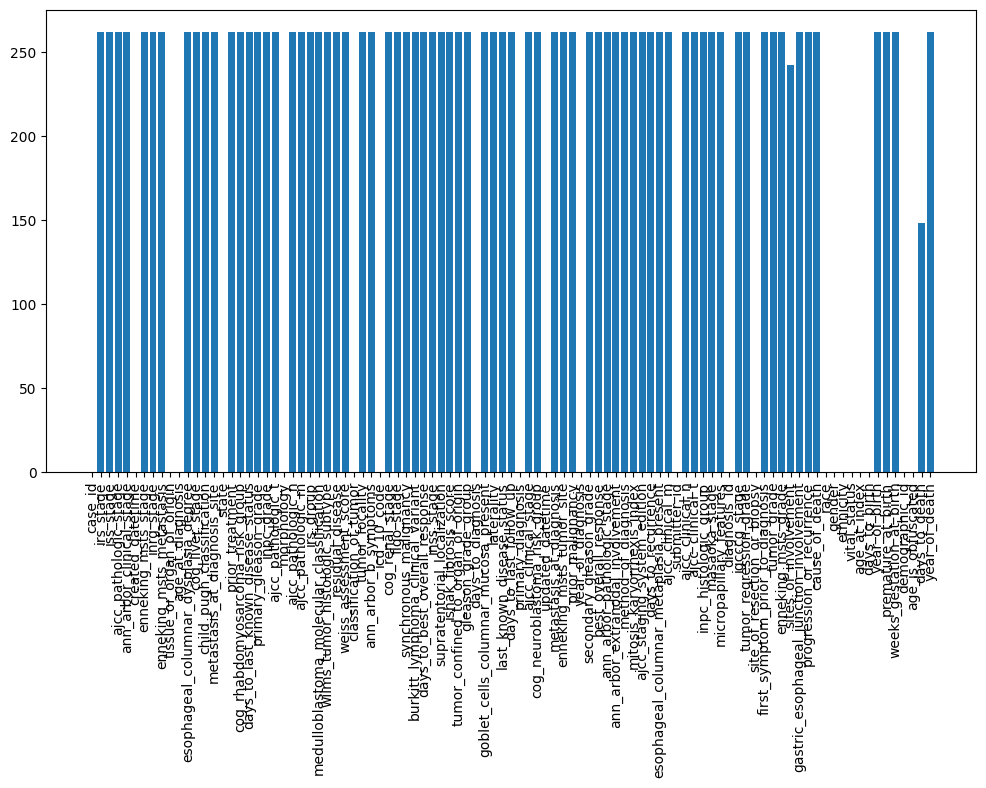

In [ ]:
# Find number of NaNs in each

countNaNs = clinicalSubset.isnull().sum()

plt.figure(figsize=(12, 6))
plt.bar(x=countNaNs.index,height=countNaNs.values)
plt.xticks(rotation='vertical')

In [ ]:
# Drop all columns that have ALL NaNs

clinicalSubset = clinicalSubset.dropna(axis=1,how="all")
clinicalSubset.head()

,case_id,created_datetime,tissue_or_organ_of_origin,age_at_diagnosis,state,morphology,classification_of_tumor,icd_10_code,days_to_diagnosis,primary_diagnosis,...,vital_status,age_at_index,submitter_id,days_to_birth,created_datetime,demographic_id,updated_datetime,age_is_obfuscated,days_to_death,state
10,798f95cc-ae1e-5307-a776-9e562c3a7bd2,2016-04-25T16:25:09.923381-05:00,Bone marrow,6000.0,released,9861/3,primary,C92.0,0.0,"Acute myeloid leukemia, NOS",...,Dead,16.0,TARGET-20-PARTAL_demographic,-6000.0,2017-02-24T21:09:52.179428-06:00,64d2be52-a4a6-5756-89f5-855e12befa20,2023-07-20T19:04:14.771876-05:00,False,531.0,released
14,d001840d-8950-5ce1-a29b-fcdd5154db64,2016-04-25T16:26:31.642772-05:00,Bone marrow,6660.0,released,9861/3,primary,C92.0,0.0,"Acute myeloid leukemia, NOS",...,Dead,18.0,TARGET-20-PASCGR_demographic,-6660.0,2017-02-24T21:13:10.738286-06:00,d41a856b-536b-5ba8-b09c-53779737eee5,2023-07-20T19:43:16.567474-05:00,False,702.0,released
23,d088a72c-7594-5ed0-b4bd-fd4914633270,2016-04-25T16:25:43.545447-05:00,Bone marrow,534.0,released,9861/3,primary,C92.0,0.0,"Acute myeloid leukemia, NOS",...,Alive,1.0,TARGET-20-PARXMP_demographic,-534.0,2017-02-24T21:11:13.552206-06:00,19ea6160-c200-5e2b-b444-0986c1dd7ce8,2023-07-20T19:20:44.340766-05:00,False,NaN,released
31,a6710fcc-984c-5c7a-b0b2-1786822e0c0f,2016-04-25T16:29:04.446887-05:00,Bone marrow,298.0,released,9861/3,primary,C92.0,0.0,"Acute myeloid leukemia, NOS",...,Alive,0.0,TARGET-20-PASRLS_demographic,-298.0,2017-02-24T21:18:18.406829-06:00,3f10c4f5-58ed-56f5-887d-403b579dbb2a,2023-07-20T20:34:45.496816-05:00,False,NaN,released
32,d1b986d2-1317-5ee7-ab78-441ea68500f0,2016-04-25T16:22:30.729569-05:00,Bone marrow,567.0,released,9861/3,primary,C92.0,0.0,"Acute myeloid leukemia, NOS",...,Dead,1.0,TARGET-20-PAEEYP_demographic,-567.0,2017-02-24T21:04:40.290774-06:00,9c9823e1-9c45-5992-af85-4b71a6138889,2023-07-20T16:59:57.169403-05:00,False,398.0,released


In [ ]:
# What variables are left?

clinicalSubset.columns

Index(['case_id', 'created_datetime', 'tissue_or_organ_of_origin',
       'age_at_diagnosis', 'state', 'morphology', 'classification_of_tumor',
       'icd_10_code', 'days_to_diagnosis', 'primary_diagnosis',
       'updated_datetime', 'year_of_diagnosis', 'submitter_id', 'diagnosis_id',
       'site_of_resection_or_biopsy', 'sites_of_involvement', 'race', 'gender',
       'ethnicity', 'vital_status', 'age_at_index', 'submitter_id',
       'days_to_birth', 'created_datetime', 'demographic_id',
       'updated_datetime', 'age_is_obfuscated', 'days_to_death', 'state'],
      dtype='object')

Outcome variables can be:

```
*   'morphology'
*   'classification_of_tumor'
*   'icd_10_code'
*   'days_to_diagnosis'
*   'site_of_resection_or_biopsy'
*   'sites_of_involvement'
*   'days_to_death'
```

Static predictive variables can be:

```
*   'age_at_diagnosis'
*   'race'
*   'gender'
*   'ethnicity'
*   'vital_status'
```

Let's observe the distribution of these variables

In [ ]:
outcome = ['morphology','classification_of_tumor','icd_10_code','days_to_diagnosis','site_of_resection_or_biopsy','sites_of_involvement','days_to_death']
static = ['age_at_diagnosis', 'race', 'gender', 'ethnicity', 'vital_status']

In [ ]:
# Morphology: All patients have same morphology assignment

clinicalSubset[outcome[0]].unique()

array(['9861/3'], dtype=object)

In [ ]:
# Classification: All tumours are primary tumours

clinicalSubset[outcome[1]].unique()

array(['primary'], dtype=object)

In [ ]:
# ICD_10 code: C92.0

clinicalSubset[outcome[2]].unique()

array(['C92.0'], dtype=object)

In [ ]:
# days_to_diagnosis: All values are 0

clinicalSubset[outcome[3]].unique()

array([0.])

In [ ]:
# site_of_resection_or_biopsy: "Not Reported", "Bone marrow" or "Blood". Majority have "Not Reported".

clinicalSubset.groupby([outcome[4]]).describe()

age_at_diagnosis                                   \
                                       count         mean          std    min   
site_of_resection_or_biopsy                                                     
Blood                                    2.0  1476.000000   694.378859  985.0   
Bone marrow                              6.0  2876.166667  1983.377565  768.0   
Not Reported                           254.0  3527.484252  2159.015774   31.0   

                                                              \
                                 25%     50%     75%     max   
site_of_resection_or_biopsy                                    
Blood                        1230.50  1476.0  1721.5  1967.0   
Bone marrow                  1476.50  2782.0  3402.0  6275.0   
Not Reported                 1378.25  3790.0  5401.0  8581.0   

                            days_to_diagnosis       ... days_to_birth         \
                                        count mean  ...           75%    max   
site_of_resection_or_biopsy                         ...                        
Blood                                     2.0  0.0  ...      -1230.50 -985.0   
Bone marrow                               6.0  0.0  ...      -1476.50 -768.0   
Not Reported                            254.0  0.0  ...      -1378.25  -31.0   

                            days_to_death                                  \
                                    count        mean          std    min   
site_of_resection_or_biopsy                                                 
Blood                                 0.0         NaN          NaN    NaN   
Bone marrow                           3.0  1236.00000  1287.141018  334.0   
Not Reported                        111.0   579.18018   383.004823   74.0   

                                                           
                               25%    50%     75%     max  
site_of_resection_or_biopsy                                
Blood                          NaN    NaN     NaN     NaN  
Bone marrow                  499.0  664.0  1687.0  2710.0  
Not Reported                 325.5  462.0   757.5  1979.0  

[3 rows x 48 columns]

In [ ]:
# sites_of_involvement: Most values are NaN except for 20 which have ['Central nervous system']

clinicalSubset[outcome[5]].tolist().count(['Central nervous system'])

20

In [ ]:
# days_to_death: 114 patients have information on how many days before death the assay was done.

clinicalSubset[outcome[6]].describe()

count     114.000000
mean      596.464912
std       428.103849
min        74.000000
25%       331.000000
50%       465.000000
75%       761.750000
max      2710.000000
Name: days_to_death, dtype: float64

In [ ]:
# age_at_diagnosis: Average age is about 10 years?

clinicalSubset[static[0]].describe()

count     262.000000
mean     3496.908397
std      2153.309796
min        31.000000
25%      1361.750000
50%      3678.500000
75%      5380.750000
max      8581.000000
Name: age_at_diagnosis, dtype: float64

In [ ]:
# race

clinicalSubset.groupby([static[1]]).describe()

age_at_diagnosis               \
                                                     count         mean   
race                                                                      
Unknown                                               21.0  3774.952381   
american indian or alaska native                       1.0  4421.000000   
asian                                                  9.0  3750.666667   
black or african american                             25.0  2691.840000   
native hawaiian or other pacific islander              3.0  3658.000000   
other                                                  7.0  2742.142857   
white                                                196.0  3577.928571   

                                                                         \
                                                   std     min      25%   
race                                                                      
Unknown                                    2397.775521    36.0  1394.00   
american indian or alaska native                   NaN  4421.0  4421.00   
asian                                      1987.462641   733.0  2139.00   
black or african american                  1902.386586   137.0   834.00   
native hawaiian or other pacific islander  2788.880958   530.0  2544.50   
other                                      1629.118108   901.0  1406.00   
white                                      2172.854893    31.0  1345.25   

                                                                    \
                                              50%      75%     max   
race                                                                 
Unknown                                    4723.0  5389.00  8581.0   
american indian or alaska native           4421.0  4421.00  4421.0   
asian                                      3748.0  5215.00  6149.0   
black or african american                  2695.0  4458.00  6460.0   
native hawaiian or other pacific islander  4559.0  5222.00  5885.0   
other                                      2758.0  3645.50  5433.0   
white                                      3818.0  5575.75  8231.0   

                                          days_to_diagnosis       ...  \
                                                      count mean  ...   
race                                                              ...   
Unknown                                                21.0  0.0  ...   
american indian or alaska native                        1.0  0.0  ...   
asian                                                   9.0  0.0  ...   
black or african american                              25.0  0.0  ...   
native hawaiian or other pacific islander               3.0  0.0  ...   
other                                                   7.0  0.0  ...   
white                                                 196.0  0.0  ...   

                                          days_to_birth         days_to_death  \
                                                    75%     max         count   
race                                                                            
Unknown                                        -1394.00   -36.0           9.0   
american indian or alaska native               -4421.00 -4421.0           0.0   
asian                                          -2139.00  -733.0           5.0   
black or african american                       -834.00  -137.0          13.0   
native hawaiian or other pacific islander      -2544.50  -530.0           1.0   
other                                          -1406.00  -901.0           3.0   
white                                          -1345.25   -31.0          83.0   

                                                                          \
                                                 mean         std    min   
race                                                                       
Unknown                                    407.555556  175.880010   8

In [ ]:
# gender: Almost equally split between males and females

clinicalSubset.groupby([static[2]]).describe()

age_at_diagnosis                                                   \
                  count         mean          std   min      25%     50%   
gender                                                                     
female            124.0  3276.282258  2217.016246  36.0   981.00  3231.0   
male              138.0  3695.152174  2082.540987  31.0  1835.25  3895.0   

                        days_to_diagnosis       ... days_to_birth        \
            75%     max             count mean  ...           75%   max   
gender                                          ...                       
female  5299.75  8581.0             124.0  0.0  ...       -981.00 -36.0   
male    5608.25  6979.0             138.0  0.0  ...      -1835.25 -31.0   

       days_to_death                                                       \
               count        mean         std   min     25%    50%     75%   
gender                                                                      
female          58.0  616.551724  479.001636  74.0  343.50  459.5  693.75   
male            56.0  575.660714  371.335980  84.0  327.25  489.5  766.75   

                
           max  
gender          
female  2710.0  
male    1979.0  

[2 rows x 48 columns]

In [ ]:
# ethnicity

clinicalSubset.groupby([static[3]]).describe()

age_at_diagnosis                                   \
                                  count         mean          std    min   
ethnicity                                                                  
Unknown                            11.0  3614.272727  2275.488303   36.0   
hispanic or latino                 45.0  3128.600000  2091.696869   31.0   
not hispanic or latino            206.0  3571.097087  2162.330750  137.0   

                                                       days_to_diagnosis       \
                           25%     50%     75%     max             count mean   
ethnicity                                                                       
Unknown                 1900.5  4607.0  5368.5  5840.0              11.0  0.0   
hispanic or latino       985.0  3386.0  4906.0  6660.0              45.0  0.0   
not hispanic or latino  1430.0  3761.0  5426.0  8581.0             206.0  0.0   

                        ... days_to_birth        days_to_death              \
                        ...           75%    max         count        mean   
ethnicity               ...                                                  
Unknown                 ...       -1900.5  -36.0           5.0  442.800000   
hispanic or latino      ...        -985.0  -31.0          19.0  498.578947   
not hispanic or latino  ...       -1430.0 -137.0          90.0  625.666667   

                                                                          
                               std    min     25%    50%     75%     max  
ethnicity                                                                 
Unknown                 123.424876  313.0  334.00  468.0  483.00   616.0  
hispanic or latino      248.727945   87.0  261.50  518.0  698.00   870.0  
not hispanic or latino  463.965080   74.0  339.75  459.5  787.75  2710.0  

[3 rows x 48 columns]

In [ ]:
# vital_status: 148 patients are alive and 114 are dead.

clinicalSubset[static[4]].value_counts()

Alive    148
Dead     114
Name: vital_status, dtype: int64

Save subsets of metadata and clinical into dedicated csv

In [ ]:
metadataSubset.to_csv(os.path.join(projDir, "UsableMetadata.csv"))
clinicalSubset.to_csv(os.path.join(projDir, "UsableClinical.csv"))

# Let's probe methylation and miRNA data

In [ ]:
ExamplePatient3 = "a37888fb-ac3c-5661-bfcf-7bd41f640579"

# Retrieve the raw data

# Specify data directory
dataDir="/content/drive/MyDrive/Comp Med Group Project/data"

# Specify file name
fileName=metadataSubset[metadataSubset["case_id"] == ExamplePatient3]["file_name"].unique()[0]

# Specify folder name
folderName=metadataSubset[metadataSubset["case_id"] == ExamplePatient3]["file_id"].unique()[0]

# We use the file identifier to take the file, since the file name in the data folder is cut off compared to what is in the table

folderDir=os.path.join(dataDir,folderName)
fileList=os.listdir(folderDir)

assert fileList[0].split(".")[0] == fileName.split(".")[0]

In [ ]:
fileDir = os.path.join(folderDir, fileList[0])

readFile = pd.read_csv(fileDir,sep="\t")

This is how miRNA data looks like

In [ ]:
readFile.head()

,miRNA_ID,read_count,reads_per_million_miRNA_mapped,cross-mapped
0,hsa-let-7a-1,90323,19964.440075,N
1,hsa-let-7a-2,90080,19910.728850,N
2,hsa-let-7a-3,91084,20132.646832,N
3,hsa-let-7b,86512,19122.080088,N
4,hsa-let-7c,414,91.508012,N


In [ ]:
# Specify file name
fileName=metadataSubset[metadataSubset["case_id"] == ExamplePatient3]["file_name"].unique()[1]

# Specify folder name
folderName=metadataSubset[metadataSubset["case_id"] == ExamplePatient3]["file_id"].unique()[1]

# We use the file identifier to take the file, since the file name in the data folder is cut off compared to what is in the table

folderDir=os.path.join(dataDir,folderName)
fileList=os.listdir(folderDir)

assert fileList[0].split(".")[0] == fileName.split(".")[0]

In [ ]:
fileDir = os.path.join(folderDir, fileList[0])

readFile = pd.read_csv(fileDir,sep="\t")

This is how methylome data looks like

In [ ]:
readFile.head()

,cg00000292,0.91843498614966
0,cg00002426,0.964228
1,cg00003994,0.019806
2,cg00005847,0.133088
3,cg00006414,0.037134
4,cg00007981,0.019762
